We are analysing the data that made Semmelweis discover the importance of handwashing.
Dr Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital.

He was thinking about childbed fever. A deadly disease affecting women that just gave birth.
In the early 1840s at the Vienna General Hospital, as many an 10% of the women giving birth die from it.
He knew that the cause of childbed fever is: contaminated hands of the doctors delivering the babies. 


In [2]:
#importing modules
import pandas as pd

#Read the dataset 
yearly = pd.read_csv('desktop/python/py projects/Handwashing discovery - Dr Semmelweis/datasets/yearly_deaths_by_clinic.csv')

#print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


The above data shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841-1846. Somehow you can see an alarming number of women died as the result of childbirth, most of them because of childbed fever.

We can now look at the proportion of deaths out of the number of women giving birth, and we see the data clearly. 
We will 'focus' on the proportion of deaths at Clinic 1

In [3]:
# calculate the proportion of deaths per no. births

yearly["proportion_deaths"] = yearly['deaths'] / yearly['births']

# we extract clinic 1 data into yearly1  and clinic2 into yearly2

yearly1 = yearly[yearly['clinic'] == "clinic 1"]
yearly2 = yearly[yearly['clinic'] == "clinic 2"]

# we print out yearly1 and yearly2

print(yearly1)
print(yearly2)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464
    year  births  deaths    clinic  proportion_deaths
6   1841    2442      86  clinic 2           0.035217
7   1842    2659     202  clinic 2           0.075968
8   1843    2739     164  clinic 2           0.059876
9   1844    2956      68  clinic 2           0.023004
10  1845    3241      66  clinic 2           0.020364
11  1846    3754     105  clinic 2           0.027970


We can now plot clinic1 and clinic2 data, to see the difference and also a pattern 

Text(3.2,0.5,'Proportion deaths')

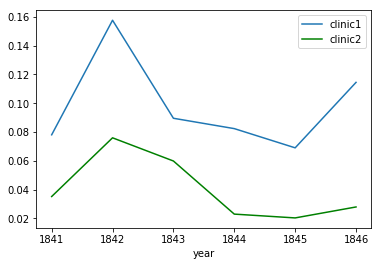

In [15]:
# making the plot appear in the notebook

%matplotlib inline

# we plot yearly proportion of deaths at the 2 clinics

ax = yearly1.plot(x='year', y='proportion_deaths', label= 'clinic1')
yearly2.plot(x='year',  y='proportion_deaths', label='clinic2', ax=ax, color = 'green')
pl.set_ylabel('Proportion deaths')



You can see that the proportion of deaths constantly is higher in Clinic1. But why is this? Semmelweis saw the same pattern and was puzzled. 
The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. 
Here is the hint: while midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Dr. Semelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever.
In an attempt to stop the high mortality rates, he decreed: Wash your hands!


We will now load in montly data from Clinic 1, to see if the request had any effect. 


In [11]:
# read monthly dataset into monthly

monthly = pd.read_csv('desktop/python/py projects/Handwashing discovery - Dr Semmelweis/datasets/monthly_deaths.csv', parse_dates=["date"])
print(monthly.columns)

# we calculate the proportion of deaths per no of births

monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

# print first rows in monthly

print(monthly.head())




Index(['date', 'births', 'deaths'], dtype='object')
        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843



We now have the data loaded and we can look at the proportion of deaths over time. 


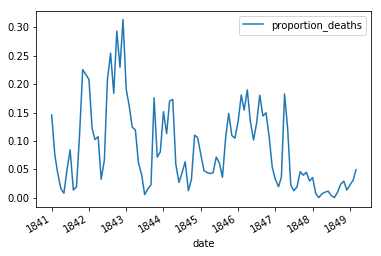

In [12]:
# plot monthly proportion of deaths

ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel = "Proportion deaths"


In the above plot, there isn't marked where the obligatory handwashing started, but there is a difference in the proportions, it is not easy to spot, but we can still do. 


Starting from 1847 the proportion of deaths is dractically reduced and, this was when Semmelweis made handwashing obligatory. 

In the below figures, the effect of handwashing is made even more clear. 

Text(0,0.5,'Proportion deaths')

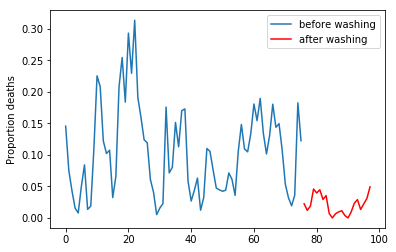

In [14]:
# date when the handwashing was made mandatory

import pandas as pd

handwashing_start = pd.to_datetime('1847-06-01')

# we then split monthly into before and after handwashing_start

before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# we plot the monthly proportion of deaths before and after handwashing

ax = before_washing.plot(y='proportion_deaths', label='before washing')
after_washing.plot(y='proportion_deaths', label='after washing', ax=ax, color='red')
ax.set_ylabel("Proportion deaths")


The graph shows that handwashing had a hige effect.
But, how much did it reduce the monthly proportion of deaths on average?


In [16]:
# difference in mean monthly proportion of deaths due to handwashing

before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards).

To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).

In [17]:
# a bootstrap analysis of the reduction od deaths due to handwashing

import numpy as np
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())
    
# calculating a 95% confidence interval from boot_mean_diff

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101258
0.975   -0.068160
dtype: float64

# CONCLUSION : 

So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.